# Running the TTGammaProcessor

This cell will copy the test files from their location on eos to your local area. This only needs to be done once!

In [1]:
# #If you have not already done so, you can copy the files to test the code on from here
# # ONLY NEEDS TO BE DONE ONCE, CAN BE COMMENTED OUT WHEN YOU 
# !xrdcp root://cmseos.fnal.gov//store/user/cmsdas/2021/long_exercises/TTGamma/TestFiles/TTGamma_1l.root .
# !xrdcp root://cmseos.fnal.gov//store/user/cmsdas/2021/long_exercises/TTGamma/TestFiles/TTbar_1l.root .
# !xrdcp root://cmseos.fnal.gov//store/user/cmsdas/2021/long_exercises/TTGamma/TestFiles/WGamma.root .
# !xrdcp root://cmseos.fnal.gov//store/user/cmsdas/2021/long_exercises/TTGamma/TestFiles/ZGamma.root .
# !xrdcp root://cmseos.fnal.gov//store/user/cmsdas/2021/long_exercises/TTGamma/TestFiles/W4Jets.root .
# !xrdcp root://cmseos.fnal.gov//store/user/cmsdas/2021/long_exercises/TTGamma/TestFiles/ZJets.root .

In [1]:
%load_ext autoreload
from coffea import util, processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

List of samples to be run on (fileset variable) and a dictionary containing the number of events processed for each sample

In [2]:
fileset = {'TTGamma_SingleLept':['TTGamma_1l.root'],
           'TTbarPowheg_Semilept':['TTbar_1l.root'],
           'W4jets':['W4Jets.root'],
           'WGamma_01J_5f':['WGamma.root'],
           'ZGamma_01J_5f_lowMass':['ZGamma.root'],
           'DYjetsM50':['ZJets.root'],
        }



Run the TTGammaProcessor on the list of files included in fileset.

You can specify the chunksize and maximum number of chunks to process from each sample (selecting a small number of events and one chunk will force coffea to process only a subset of the events for quicker debugging)

In [27]:
#autoreload forces the kernel to reload the processor to include any new changes
%autoreload 2
from ttgamma import TTGammaProcessor
import awkward as ak

import time
tstart = time.time()

#Run Coffea code using uproot
output = processor.run_uproot_job(
    fileset,
    "Events",
    TTGammaProcessor(isMC=True),
    processor.iterative_executor,
    executor_args={'schema': NanoAODSchema,'workers': 4},
    #chunksize=1000,
    #maxchunks=1,
)

elapsed = time.time() - tstart
print("Total time: %.1f seconds"%elapsed)
print("Total rate: %.1f events / second"%(output['EventCount'].value/elapsed))

Processing:   0%|          | 0/14 [00:00<?, ?chunk/s]

Total time: 68.9 seconds
Total rate: 18506.7 events / second


In [4]:
output

{'photon_pt': <Hist (dataset,pt,category,lepFlavor,systematic) instance at 0x7f6cdeffcb70>,
 'photon_eta': <Hist (dataset,eta,category,lepFlavor,systematic) instance at 0x7f6cddfe9f28>,
 'photon_chIso': <Hist (dataset,chIso,category,lepFlavor,systematic) instance at 0x7f6cddfe9dd8>,
 'photon_lepton_mass_3j0t': <Hist (dataset,mass,category,lepFlavor,systematic) instance at 0x7f6cddfe9c88>,
 'M3': <Hist (dataset,M3,category,lepFlavor,systematic) instance at 0x7f6cddfe9b70>,
 'EventCount': value_accumulator(int, 1274912)}

/uscms/home/lhasa/nobackup/TTGamma_LongExercise/ttgenv/lib/python3.6/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)


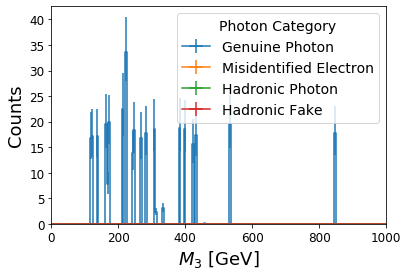

In [22]:
from coffea import hist
#hist.plot1d(output['photon_pt'],overlay='dataset')
hist.plot1d(output['M3'].sum('systematic').sum('lepFlavor').integrate('dataset','TTGamma_SingleLept'), overlay='category')

[autoreload of ttgamma.processor failed: Traceback (most recent call last):
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 378, in superreload
    module = reload(module)
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  Fil

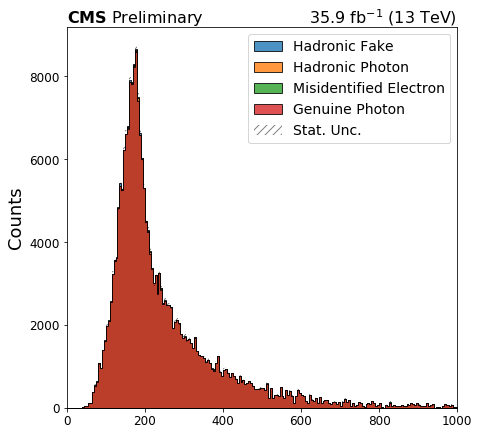

In [21]:
from ttgamma.utils.plotting import plotWithRatio
plotWithRatio(output['M3'].sum('systematic').sum('lepFlavor').integrate('dataset','TTGamma_SingleLept'),hData=None,overlay='category')

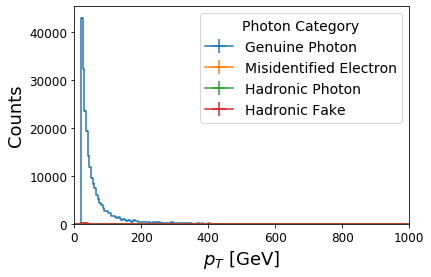

In [17]:
hist.plot1d(output['photon_pt'].sum('systematic').sum('lepFlavor').integrate('dataset','TTGamma_SingleLept'), overlay='category')

In [20]:
hist.plot1d?

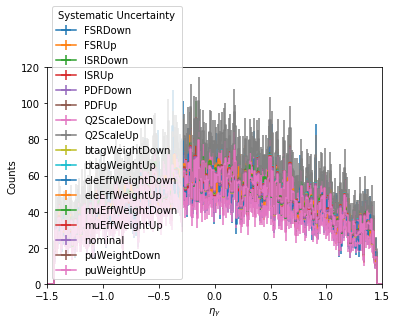

In [11]:
hist.plot1d(output['photon_eta'].sum('category').sum('lepFlavor').integrate('dataset','TTGamma_SingleLept'), overlay='systematic')

/uscms/home/lhasa/nobackup/TTGamma_LongExercise/ttgenv/lib/python3.6/site-packages/coffea/hist/hist_tools.py:347: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f6cf10e2a58>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)


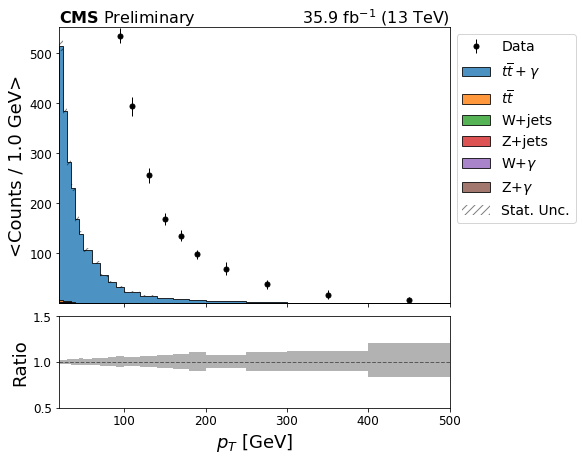

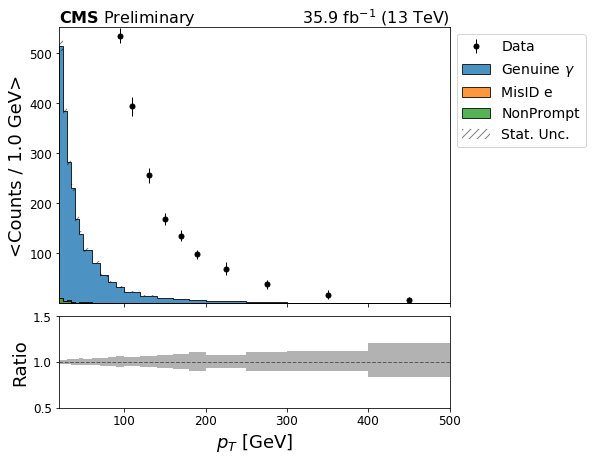

In [12]:
import numpy as np

import matplotlib.pyplot as plt
from cycler import cycler
from coffea import hist, util

from ttgamma.utils.plotting import plotWithRatio, RebinHist, SetRangeHist

grouping= {'$t\overline{t}+\gamma$': ['TTGamma_Dilepton','TTGamma_SingleLept','TTGamma_Hadronic'],
            '$t\overline{t}$'  : ['TTbarPowheg_Dilepton', 'TTbarPowheg_Semilept', 'TTbarPowheg_Hadronic'],
            'Single top':['ST_s_channel', 'ST_tW_channel', 'ST_tbarW_channel', 'ST_tbar_channel', 'ST_t_channel'],
            'W+jets':['W1jets', 'W2jets', 'W3jets', 'W4jets'],
            'Z+jets'  : ['DYjetsM10to50', 'DYjetsM50'],
            'W+$\gamma$' : ['WGamma_01J_5f'],
            'Z+$\gamma$' : ['ZGamma_01J_5f_lowMass'],
            'TTV'    : ['TTWtoLNu','TTWtoQQ','TTZtoLL'],
            'GJets'  : [ 'GJets_HT40To100', 'GJets_HT100To200', 'GJets_HT200To400', 'GJets_HT400To600', 'GJets_HT600ToInf'],
            'QCD'    :['QCD_Pt20to30_Ele', 'QCD_Pt30to50_Ele', 'QCD_Pt50to80_Ele', 'QCD_Pt80to120_Ele', 'QCD_Pt120to170_Ele', 'QCD_Pt170to300_Ele', 'QCD_Pt300toInf_Ele', 'QCD_Pt20to30_Mu', 'QCD_Pt30to50_Mu', 'QCD_Pt50to80_Mu', 'QCD_Pt80to120_Mu', 'QCD_Pt120to170_Mu', 'QCD_Pt170to300_Mu', 'QCD_Pt300to470_Mu', 'QCD_Pt470to600_Mu', 'QCD_Pt600to800_Mu', 'QCD_Pt800to1000_Mu', 'QCD_Pt1000toInf_Mu'],
  }

groupCategory= {"Genuine $\gamma$": slice(1,2),
                "MisID e":slice(2,3),
                "NonPrompt":slice(3,5),
               }


#Get photon pt distribution from coffea output
h = output['photon_pt']

#sum over lepton flavors (get both electron and muon)
h = h.sum('lepFlavor')

#integrate over systematics, selecting only "nominal"
h = h.integrate('systematic','nominal')

#group the datasets into the sample types
h = h.group('dataset',hist.Cat(r'dataset',r'Samples',sorting='placement'),grouping)

#group the photon category axis into the category types listed above
h = h.group('category',hist.Cat(r'category',r'Category',sorting='placement'),groupCategory)

#rebin the pt axis
h = h.rebin("pt",hist.Bin("pt",h.axis("pt").label,np.array([20,25,30,35,40,45,50,60,70,80,90,100,120,140,160,180,200,250,300,400,500])))

hData = output['photon_pt'].sum('lepFlavor').sum('systematic').sum('dataset').sum('category')
hData = hData.rebin("pt",hist.Bin("pt",h.axis("pt").label,np.array([20,25,30,35,40,45,50,60,70,80,90,100,120,140,160,180,200,250,300,400,500])))

plotWithRatio(h.sum('category'), hData, overlay='dataset', invertStack=True, binwnorm=1., xRange=[20,500], yRange=[5e-2,None], logY=False,leg='right')
plotWithRatio(h.sum('dataset'), hData, overlay='category', invertStack=True, binwnorm=1., xRange=[20,500], yRange=[5e-2,None], logY=False,leg='right')

/uscms/home/lhasa/nobackup/TTGamma_LongExercise/ttgenv/lib/python3.6/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/uscms/home/lhasa/nobackup/TTGamma_LongExercise/ttgenv/lib/python3.6/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = numpy.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:871: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
/uscms/home/lhasa/nobackup/TTGamma_LongExercise/ttgenv/lib/python3.6/site-packages/coffea/hist/plot.py:378: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)


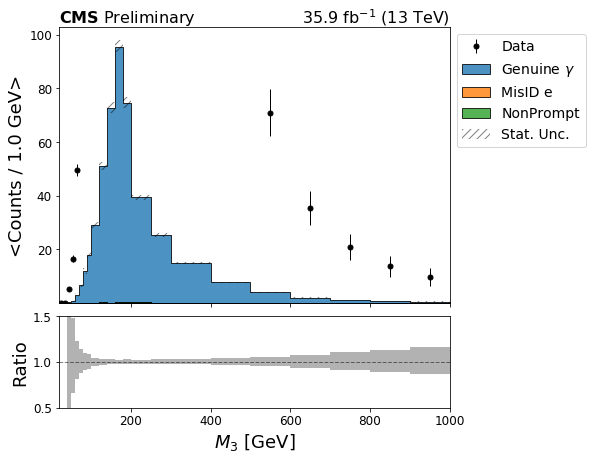

In [23]:
grouping1= {'$t\overline{t}+\gamma$':['TTGamma_SingleLept']}
groupCategory= {"Genuine $\gamma$": slice(1,2),
                "MisID e":slice(2,3),
                "NonPrompt":slice(3,5),
               }
#Get photon pt distribution from coffea output
h1 = output['M3']

#sum over lepton flavors (get both electron and muon)
h1 = h1.sum('lepFlavor')

#integrate over systematics, selecting only "nominal"
h1 = h1.integrate('systematic','nominal')

#group the datasets into the sample types
h1 = h1.group('dataset',hist.Cat(r'dataset',r'Samples',sorting='placement'),grouping1)

#group the photon category axis into the category types listed above
h1 = h1.group('category',hist.Cat(r'category',r'Category',sorting='placement'),groupCategory)

#rebin the pt axis
h1 = h1.rebin("M3",hist.Bin("M3",h1.axis("M3").label,np.array([20,30,40,50,60,70,80,90,100,120,140,160,180,200,250,300,400,500,600,700,800,900,1000])))

h1Data = output['M3'].sum('lepFlavor').sum('systematic').sum('dataset').sum('category')
h1Data = h1Data.rebin("M3",hist.Bin("M3",h1.axis("M3").label,np.array([20,30,40,50,60,70,80,90,100,120,140,160,180,200,250,300,400,500,600,700,800,900,1000])))

#plotWithRatio(h1.sum('category'), hData, overlay='dataset', invertStack=True, binwnorm=1., xRange=[20,1000], yRange=[5e-2,None], logY=True,leg='right')
plotWithRatio(h1.sum('dataset'), h1Data, overlay='category', invertStack=True, binwnorm=1., xRange=[20,1000], yRange=[5e-2,None], logY=False,leg='right')

In [25]:
grouping1= {'$t\overline{t}+\gamma$':['TTGamma_SingleLept']}
groupCategory= {"Genuine $\gamma$": slice(1,2),
                "MisID e":slice(2,3),
                "NonPrompt":slice(3,5),
               }
#Get photon pt distribution from coffea output
h1 = output['photon_chIso']

#sum over lepton flavors (get both electron and muon)
h1 = h1.sum('lepFlavor')

#integrate over systematics, selecting only "nominal"
h1 = h1.integrate('systematic','nominal')

#group the datasets into the sample types
h1 = h1.group('dataset',hist.Cat(r'dataset',r'Samples',sorting='placement'),grouping1)

#group the photon category axis into the category types listed above
h1 = h1.group('category',hist.Cat(r'category',r'Category',sorting='placement'),groupCategory)

#rebin the pt axis
h1 = h1.rebin("chIso",hist.Bin("chIso",h1.axis("chIso").label,np.arange(0,21,10)))

h1Data = output['photon_chIso'].sum('lepFlavor').sum('systematic').sum('dataset').sum('category')
h1Data = h1Data.rebin("chIso",hist.Bin("chIso",h1.axis("chIso").label,np.array([0,5,10,15,20])))

#plotWithRatio(h1.sum('category'), hData, overlay='dataset', invertStack=True, binwnorm=1., xRange=[20,1000], yRange=[5e-2,None], logY=True,leg='right')
plotWithRatio(h1.sum('dataset'), h1Data, overlay='category', invertStack=True, binwnorm=1., xRange=[0,21], yRange=[5e-2,None], logY=False,leg='right')

ValueError: Axis <Bin (name=chIso) instance at 0x7f6cd30f6ba8> has no interval that fully contains identifier <Interval ([9.95, 10)) instance at 0x7f6cd3143a58>

# Accessing Arrays Interactively

Below is an example of loading a NanoAOD file interactively. This can be very useful for developing the code, and debugging any issues. Use this area to build your intuition for working with Coffea and awkward arrays!

In [ ]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

fname = "./TTGamma_1l.root"
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()

Once you have opened the file, you can explore its contents using the 'fields' syntax

In [ ]:
events.fields

In [ ]:
events.GenPart.fields

There is also a docstring for each of these variables in NanoAOD, which you can access using '?':

In [ ]:
events.Jet.rawFactor?

In [ ]:
events.HLT.fields

In [ ]:
events.Pileup.nTrueInt.fields